# Сравнение с Sklearn на примере датасета Moon

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
import numpy as np
from src.multi_layer_perceptron import MultiLayerPerceptron
import matplotlib.pyplot as plt


X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Моя модель
my_model = MultiLayerPerceptron(input_size=2, hidden_size=10, num_classes=2, learning_rate=0.5)
my_model.fit(X, y, epochs=1000)

# Оценка
preds = my_model.predict(X)
accuracy = np.mean(preds == y)

# Sklearn
sk_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42, solver='sgd', learning_rate_init=0.1)
sk_model.fit(X, y)
sk_acc = sk_model.score(X, y)

print(f"Моя точность: {accuracy:.4f}")
print(f"Sklearn точность: {sk_acc:.4f}")

Epoch 0, Loss: 0.693231, Accuracy: 0.5880
Веса W1 (среднее: 0.000188, std: 0.008517):
Веса W2 (среднее: 0.001490, std: 0.011543)
---
Epoch 100, Loss: 0.246779, Accuracy: 0.8740
Веса W1 (среднее: 0.052828, std: 0.415586):
Веса W2 (среднее: 0.001490, std: 0.507771)
---
Epoch 200, Loss: 0.246045, Accuracy: 0.8720
Веса W1 (среднее: 0.059219, std: 0.419086):
Веса W2 (среднее: 0.001490, std: 0.528066)
---
Epoch 300, Loss: 0.245950, Accuracy: 0.8720
Веса W1 (среднее: 0.061531, std: 0.416260):
Веса W2 (среднее: 0.001490, std: 0.533309)
---
Epoch 400, Loss: 0.245863, Accuracy: 0.8720
Веса W1 (среднее: 0.061031, std: 0.414907):
Веса W2 (среднее: 0.001490, std: 0.536477)
---
Epoch 500, Loss: 0.245402, Accuracy: 0.8720
Веса W1 (среднее: 0.056220, std: 0.415665):
Веса W2 (среднее: 0.001490, std: 0.539511)
---
Epoch 600, Loss: 0.242288, Accuracy: 0.8720
Веса W1 (среднее: 0.041886, std: 0.425352):
Веса W2 (среднее: 0.001490, std: 0.548216)
---
Epoch 700, Loss: 0.229893, Accuracy: 0.8820
Веса W1 (сред

# Графики для сравнения

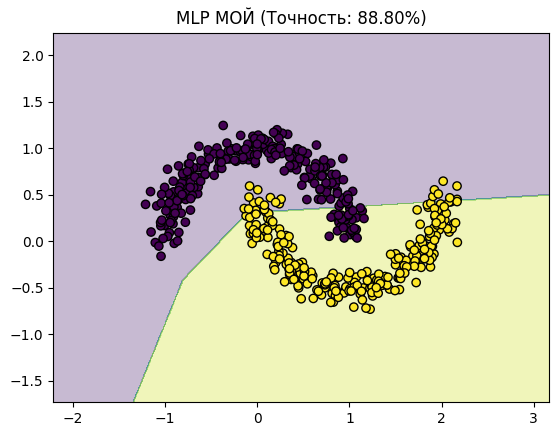

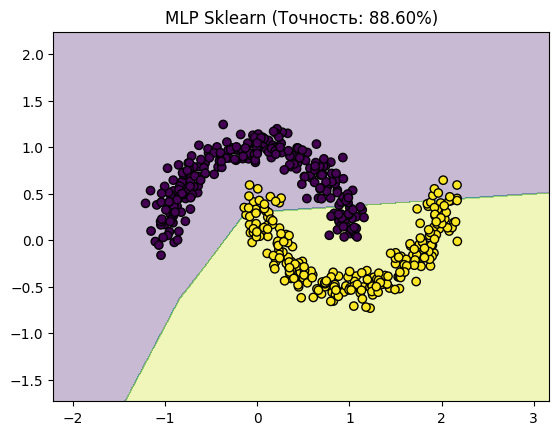

In [ ]:
# Моя визуализация
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = my_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title(f'MLP МОЙ (Точность: {accuracy:.2%})')
plt.show()

# Визуализация Sklearn
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = sk_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title(f'MLP Sklearn (Точность: {sk_acc:.2%})')
plt.show()
plt.savefig("notebooks/decision_boundary.png", dpi=150, bbox_inches='tight')